In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

In [9]:
central_dogma = gs.ReactionModel(
                species = {
                    'DNA': 1,
                    'mRNA': 0,
                    'Protein': 0
                },
                propensities = {
                    'transcription_propensity' : 0.3,
                    'translation_propensity': 10.04,
                    'mRNA_degradation' : np.log(2)/2,
                    'Protein_degradation' : np.log(2)/60
                },
                reactions = {
                    'transcription' : ['transcription_propensity', 'DNA'],
                    'translation' :   ['translation_propensity', 'mRNA'],
                    'mRNA_deg' :      ['mRNA_degradation', 'mRNA'],
                    'Protein_deg' :   ['Protein_degradation', 'Protein'],
                },
                q = {
                    'transcription' :   {'create_rna' : ['mRNA']},
                    'translation' :     {'create' : ['Protein']},
                    'mRNA_deg' :        {'destroy' : ['mRNA']},
                    'Protein_deg' :     {'destroy' : ['Protein']},
                },
                exclude_from_division=['DNA']
)
tmax = 720
central_dogma_sim = gs.Gillespie(reaction_model=central_dogma, model_name='central_dogma', tmax=tmax, sampling_time=0.001, cells=1, division_time=18)
# central_dogma_sim.simulate_division(model='adder')
central_dogma_sim.simulate()

100%|██████████| 1/1 [00:53<00:00, 53.40s/it]


(0.0, 40.0)

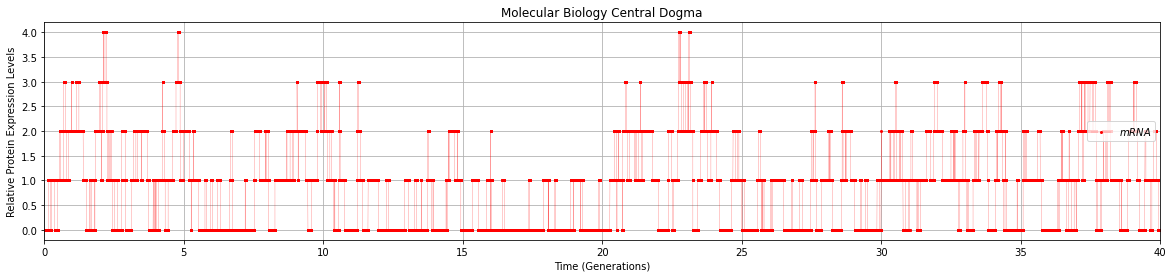

In [10]:
df = pd.read_csv('central_dogma.csv', delimiter='|')
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(df['time']/18, df['mRNA'], 'o-',color='red',lw=0.2,ms=2, label= r'$mRNA$')

fig.set_size_inches(20, 4)

ax.set_title('Molecular Biology Central Dogma')

ax.set_xlabel('Time (Generations)')
ax.set_ylabel('Relative Protein Expression Levels')
ax.legend(loc=5)
ax.set_xlim(0, 40)

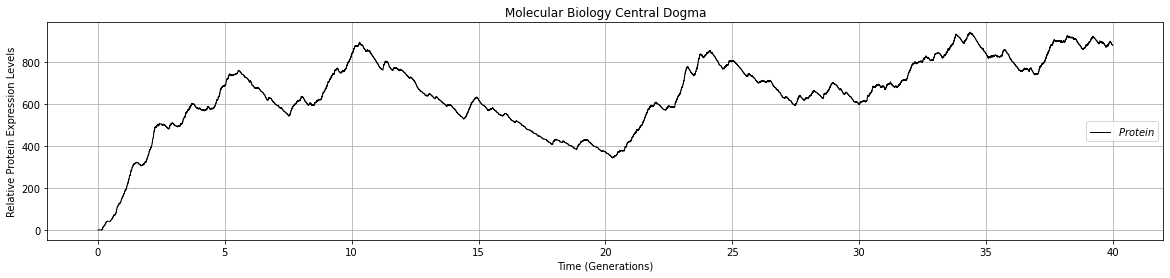

In [11]:
df = pd.read_csv('central_dogma.csv', delimiter='|')
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(df['time']/18,df['Protein'], '-', color='black', lw=1, label= r'$Protein$')

fig.set_size_inches(20, 4)

ax.set_title('Molecular Biology Central Dogma')

ax.set_xlabel('Time (Generations)')
ax.set_ylabel('Relative Protein Expression Levels')
ax.legend(loc=5)

plt.grid(True)

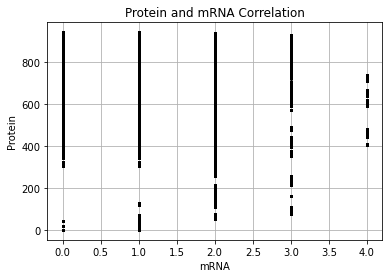

In [12]:
df = pd.read_csv('central_dogma.csv', delimiter='|')
plt.plot(df['mRNA'],df['Protein'], 'o', color='black', ms=2)
plt.title('Protein and mRNA Correlation')
plt.xlabel('mRNA')
plt.ylabel('Protein')
plt.grid(True)

In [40]:
central_dogma = gs.ReactionModel(
                species = {
                    'DNA': 1,
                    'mRNA': 0,
                    'Protein': 0
                },
                propensities = {
                    'transcription_propensity' : 0.3,
                    'translation_propensity': 10.04,
                    'mRNA_degradation' : np.log(2)/2,
                    'Protein_degradation' : np.log(2)/60
                },
                reactions = {
                    'transcription' : ['transcription_propensity', 'DNA'],
                    'translation' :   ['translation_propensity', 'mRNA'],
                    'mRNA_deg' :      ['mRNA_degradation', 'mRNA'],
                    'Protein_deg' :   ['Protein_degradation', 'Protein'],
                },
                q = {
                    'transcription' :   {'create_rna' : ['mRNA']},
                    'translation' :     {'create' : ['Protein']},
                    'mRNA_deg' :        {'destroy' : ['mRNA']},
                    'Protein_deg' :     {'destroy' : ['Protein']},
                },
                exclude_from_division=['DNA']
)
tmax = 720

central_dogma_sim = gs.Gillespie(reaction_model=central_dogma, model_name='central_dogma_2', tmax=tmax, sampling_time=1, cells=5000, time_stamp=tmax)
central_dogma_sim.simulate()

100%|██████████| 5000/5000 [59:10<00:00,  1.41it/s]


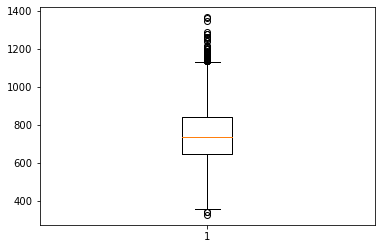

In [84]:
df = pd.read_csv('central_dogma_2.csv', delimiter='|')
plt.boxplot(df['Protein']);

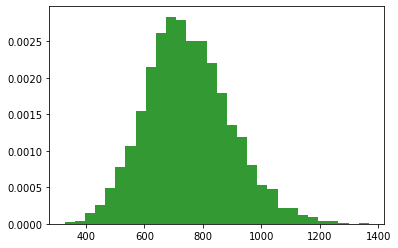

In [59]:
df = pd.read_csv('central_dogma_2.csv', delimiter='|')
plt.hist(df['Protein'],color='green', bins=30,density=True, alpha=0.8);
# plt.plot(np.random.normal(100))

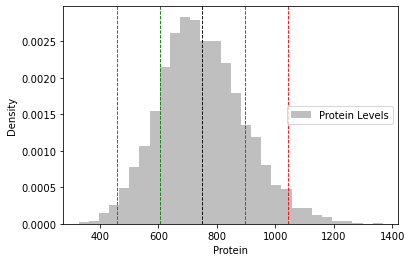

In [86]:
protein_mean = df['Protein']

fig3, ax3 = plt.subplots()
ax3.hist(protein_mean, bins=30, label='Protein Levels', color='grey', alpha=0.5, density=True);
ax3.set_xlabel('Protein')
ax3.set_ylabel('Density')
plt.axvline(np.mean(protein_mean), c='black', linestyle='--', lw=0.9)

plt.axvline(np.mean(protein_mean) + np.std(protein_mean), c='green', linestyle='--', lw=0.9)
plt.axvline(np.mean(protein_mean) - np.std(protein_mean), c='green', linestyle='--', lw=0.9)

plt.axvline(np.mean(protein_mean) + 2*np.std(protein_mean), c='red', linestyle='--', lw=0.9)
plt.axvline(np.mean(protein_mean) - 2*np.std(protein_mean), c='red', linestyle='--', lw=0.9)
ax3.legend(loc=5)

In [55]:
df = pd.read_csv('central_dogma_2.csv', delimiter='|')

Protein_Mean = df.Protein.mean()
Protein_Median = df.Protein.median()
Protein_STD = df['Protein'].std()
Protein_Variance = Protein_STD**2

print(f'Mean: {Protein_Mean}')
print(f'Standard Deviation: {Protein_STD}')
print(f'Variance: {Protein_Variance}')

Mean: 750.437
Standard Deviation: 146.2924944410545
Variance: 21401.493929785956
